
# Delta-Kronos — Fluxo CI/CD (Editável)

Este notebook gera o diagrama de fluxo no estilo **Continuous Delivery** (deploy manual) e **Continuous Deployment** (deploy automático).  
Você pode **editar os parâmetros** no bloco de código abaixo para ajustar textos e etapas.

> Dica: altere `PROJECT_NAME`, listas de passos e chame a função `plot_flux()` novamente.


In [1]:

# =====================
# Parâmetros do desenho
# =====================

PROJECT_NAME = "delta-kronos"

# Etapas comuns (CI)
BASE_STEPS = [
    "Código",
    "Build",
    "Testes\n(unit/linters)",
    "Pacote\n(artefatos)",
]

# Etapas específicas deste projeto antes do deploy
PROJECT_STEPS = [
    "Provisionar\n(SSH/Ansible)",
    "Registrar\n(Zabbix REST)",
]

# Rótulos das trilhas
LABEL_CI = "Continuous Integration"
LABEL_CD = "Continuous Delivery"
LABEL_CDEP = "Continuous Deployment"

# Saídas
OUTPUT_PNG = "delta-kronos-fluxo.png"
OUTPUT_SVG = "delta-kronos-fluxo.svg"
# Instalar dependências necessárias


In [2]:

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrow

def add_box(ax, xy, text, width=2.6, height=0.9):
    rect = Rectangle(xy, width, height, fill=False, linewidth=2)
    ax.add_patch(rect)
    ax.text(xy[0] + width/2, xy[1] + height/2, text, ha='center', va='center', fontsize=11)
    return rect

def add_arrow(ax, start, end):
    # seta simples, sem definir cor específica
    ax.add_patch(FancyArrow(start[0], start[1], end[0]-start[0], end[1]-start[1],
                            width=0.02, head_width=0.2, head_length=0.25,
                            length_includes_head=True))

def plot_flux(project_name=PROJECT_NAME, base_steps=None, project_steps=None,
              label_ci=LABEL_CI, label_cd=LABEL_CD, label_cdep=LABEL_CDEP,
              out_png=OUTPUT_PNG, out_svg=OUTPUT_SVG, show=True):
    if base_steps is None:
        base_steps = BASE_STEPS
    if project_steps is None:
        project_steps = PROJECT_STEPS

    fig, ax = plt.subplots(figsize=(14, 6))

    # posições em X suficientes para base + projeto + deploy
    total_steps = len(base_steps) + len(project_steps) + 1  # +1 deploy
    # gerar espaçamento dinâmico
    xs = [0.5 + 3.1*i for i in range(total_steps)]
    y1, y2 = 3.6, 1.6

    # Títulos
    ax.text(0.5, 4.8, f"Fluxo de Trabalho — {project_name}", fontsize=16, weight='bold')

    # Função interna para desenhar uma trilha
    def draw_lane(y, deploy_label):
        # desenha base
        for i, label in enumerate(base_steps):
            add_box(ax, (xs[i], y), label)
            if i < len(base_steps)-1:
                add_arrow(ax, (xs[i]+2.6, y+0.45), (xs[i+1], y+0.45))

        # projeto
        offset = len(base_steps)
        for j, label in enumerate(project_steps):
            idx = offset + j
            add_box(ax, (xs[idx], y), label)
            add_arrow(ax, (xs[idx-1]+2.6, y+0.45), (xs[idx], y+0.45))

        # deploy
        add_arrow(ax, (xs[offset+len(project_steps)-1]+2.6, y+0.45), (xs[-1], y+0.45))
        add_box(ax, (xs[-1], y), deploy_label)

    # Top lane (CD - manual)
    draw_lane(y1, "Deploy\n(manual)")
    ax.text(xs[0], y1-0.2, label_ci, fontsize=11)
    ax.text(xs[len(base_steps)], y1-0.2, label_cd, fontsize=11)

    # Bottom lane (CDEP - automático)
    draw_lane(y2, "Deploy\n(automático)")
    ax.text(xs[0], y2-0.2, label_ci, fontsize=11)
    ax.text(xs[len(base_steps)], y2-0.2, label_cdep, fontsize=11)

    # Aparência do gráfico
    ax.set_xlim(xs[0]-0.5, xs[-1]+3.0)
    ax.set_ylim(0.5, 5.2)
    ax.axis('off')

    # Salvar
    fig.tight_layout()
    fig.savefig(out_png, dpi=200, bbox_inches='tight')
    fig.savefig(out_svg, bbox_inches='tight')
    if show:
        plt.show()
    else:
        plt.close(fig)

print("Funções carregadas. Edite parâmetros e chame plot_flux() para gerar a figura.")


Funções carregadas. Edite parâmetros e chame plot_flux() para gerar a figura.


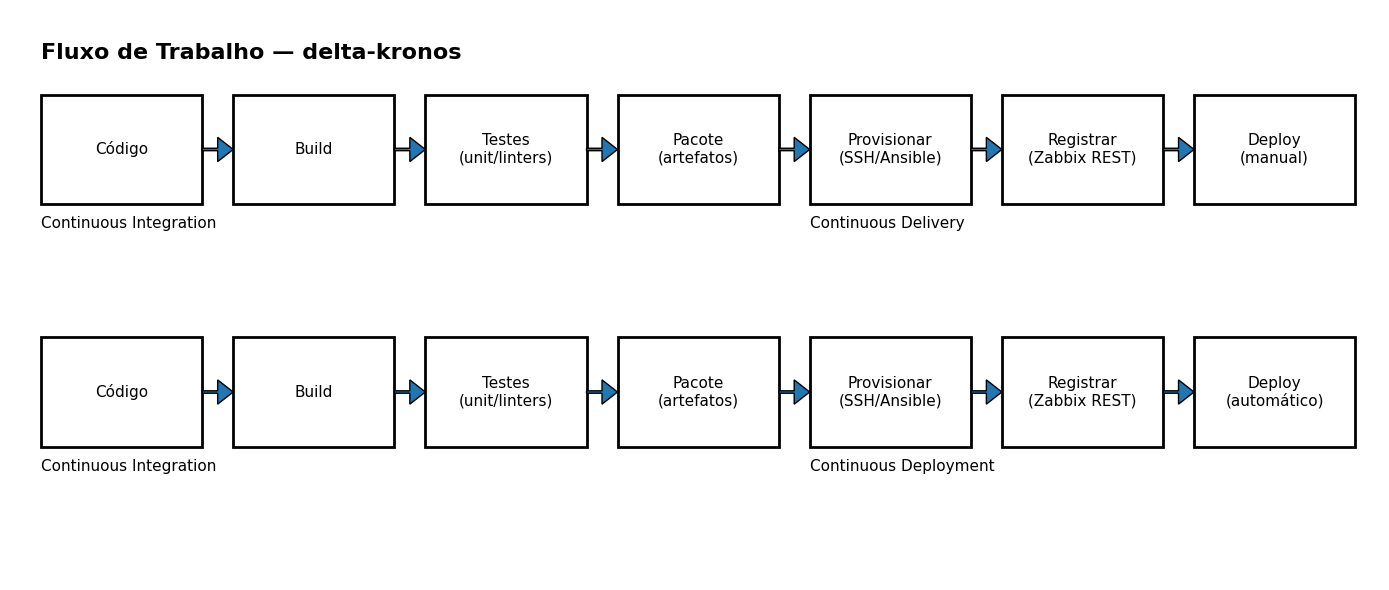

Arquivos salvos: delta-kronos-fluxo.png, delta-kronos-fluxo.svg


In [3]:

# Gerar a figura com os parâmetros atuais
plot_flux()

print(f"Arquivos salvos: {OUTPUT_PNG}, {OUTPUT_SVG}")
